95% Confidence interval on slope: [ 2.7100061   3.30510339]
95% Confidence interval on intercept: [-0.15585331  0.22667859]


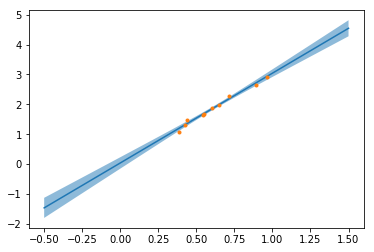

In [1]:
import numpy as np
import scipy.stats as stats
class SLR():
    def __init__(self):
        self.coef=None
        self.intercept=None
        self.n=None
    #Fit simple linear regresion model
    def fit(self,x,y):
        self.coef,self.intercept=np.polyfit(x,y,1)
        self.n=len(x)
        self.x=np.copy(x)
        self.y=np.copy(y)

    #Get confidence interval on parameters
    def get_ci(self,confidence=0.95):
        if self.n==None:
            print("ERROR, MODEL NOT FITTED")
            return -1

        if self.coef is not None and self.n>2:
            ci=[]
            t=stats.t.ppf(1.0-(1.0-confidence)/2,self.n-2)
            self.sc=np.sqrt(np.sum((self.coef*self.x+self.intercept-self.y)**2)/(self.n-2))
            self.sc/=np.sqrt(np.sum((self.x-np.mean(self.x))**2))
            self.si=self.sc*np.sqrt(np.mean(self.x**2))

            ci=np.zeros((2,2))
            ci[0,0]=self.coef-self.sc*t
            ci[0,1]=self.coef+self.sc*t
            ci[1,0]=self.intercept-self.si*t
            ci[1,1]=self.intercept+self.si*t

        else:
            ci=[]
        return ci

    #Prediction function. Pass confidence level as ci to get confidence interval
    def predict(self,x,ci=None):
        if self.n==None:
            print("ERROR, MODEL NOT FITTED")
            return -1

        pred=self.coef*x+self.intercept
        if ci is not None:
            t=stats.t.ppf(1.0-(1.0-ci)/2,self.n-2)
            s=np.sum((self.coef*self.x+self.intercept-self.y)**2)/(self.n-2)
            s=np.sqrt(s*(1.0/self.n+(x-np.mean(self.x))**2/np.sum((self.x-np.mean(self.x))**2)))

            return pred, [pred-t*s,pred+t*s]
        else:
            return pred


import matplotlib.pyplot as plt
np.random.seed(0)
x=np.random.random(size=(10,))
y=3.0*x+np.random.normal(0.0,0.1,size=(10,))

xp=np.linspace(-0.5,1.5,201)

#Create regressor object
slr=SLR()

#Fit model
slr.fit(x,y)

#Get 95% confidence interval
ci=slr.get_ci(0.95)
print("95% Confidence interval on slope: " + str(ci[0,:]))
print("95% Confidence interval on intercept: " + str(ci[1,:]))

#Plot prediction. 95% confidence interval
yp,[yp_low,yp_high] = slr.predict(xp, ci=0.95)

plt.plot(xp,yp)
plt.plot(x,y,'.')
plt.fill_between(xp,yp_low,yp_high,alpha=0.5)
plt.show()


95% Confidence interval on slope: [ 2.92442501  3.06296199]
95% Confidence interval on intercept: [-0.01614312  0.06057333]


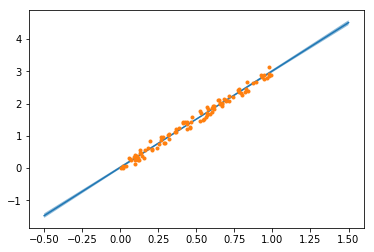

In [3]:
np.random.seed(0)
x=np.random.random(size=(100,))
y=3.0*x+np.random.normal(0.0,0.1,size=(100,))

xp=np.linspace(-0.5,1.5,201)

#Create regressor object
slr=SLR()

#Fit model
slr.fit(x,y)

#Get 95% confidence interval
ci=slr.get_ci(0.95)
print("95% Confidence interval on slope: " + str(ci[0,:]))
print("95% Confidence interval on intercept: " + str(ci[1,:]))

#Plot prediction. 95% confidence interval
yp,[yp_low,yp_high] = slr.predict(xp, ci=0.95)

plt.plot(xp,yp)
plt.plot(x,y,'.')
plt.fill_between(xp,yp_low,yp_high,alpha=0.5)
plt.show()

Importamos las dependencias

In [4]:
import numpy as np
import scipy.stats as stats

In [ ]:
Creamos la clase SLR con tres métodos:
    - fit
    - get_ci